# Import Library

In [1]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd

from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split 
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from keras.utils import np_utils

# Import Dataset

https://www.kaggle.com/prakharrathi25/google-play-store-reviews

In [2]:
df = pd.read_csv('reviews.csv')
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,https://play-lh.googleusercontent.com/a-/AOh14...,I cannot open the app anymore,1,0,5.4.0.6,2020-10-27 21:24:41,NaN,NaN,newest,com.anydo
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,https://play-lh.googleusercontent.com/a-/AOh14...,I have been begging for a refund from this app...,1,0,NaN,2020-10-27 14:03:28,"Please note that from checking our records, yo...",2020-10-27 15:05:52,newest,com.anydo
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,Sudhakar .S,https://play-lh.googleusercontent.com/a-/AOh14...,Very costly for the premium version (approx In...,1,0,NaN,2020-10-27 08:18:40,NaN,NaN,newest,com.anydo
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,SKGflorida@bellsouth.net DAVID S,https://play-lh.googleusercontent.com/-75aK0WF...,"Used to keep me organized, but all the 2020 UP...",1,0,NaN,2020-10-26 13:28:07,What do you find troublesome about the update?...,2020-10-26 14:58:29,newest,com.anydo
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,Louann Stoker,https://play-lh.googleusercontent.com/-pBcY_Z-...,Dan Birthday Oct 28,1,0,5.6.0.7,2020-10-26 06:10:50,NaN,NaN,newest,com.anydo
...,...,...,...,...,...,...,...,...,...,...,...,...
12490,gp:AOqpTOEQPqib7pb6vFyjMY9JEfsMs_u8WCdqg6mbcar...,Mildred Olima,https://play-lh.googleusercontent.com/a-/AOh14...,"I really like the planner, it helps me achieve...",5,0,4.5.4,2018-12-21 00:13:09,NaN,NaN,newest,com.appxy.planner
12491,gp:AOqpTOE1KKOOVVKUfhAfXQs2NfJpoywfucrJCMK3Hmu...,Roaring Grizzly Bear,https://play-lh.googleusercontent.com/a-/AOh14...,😁****😁,5,0,NaN,2018-12-12 21:52:56,NaN,NaN,newest,com.appxy.planner
12492,gp:AOqpTOFEn5UgYYggqiHKauDJVLLN8-16nk1AfZbEhkj...,amirbadang,https://play-lh.googleusercontent.com/-CM2FcrU...,Very useful apps. You must try it,5,0,4.5.4,2018-12-11 15:49:43,NaN,NaN,newest,com.appxy.planner
12493,gp:AOqpTOHOH6YdYLR91qZdYpeIVkMI-LeAE0EwYgrctid...,Emma Stebbins,https://play-lh.googleusercontent.com/-oCj6g6k...,Would pay for this if there were even more add...,5,0,4.5.4,2018-12-06 04:59:26,NaN,NaN,newest,com.appxy.planner


In [3]:
df = df.iloc[:, 3:5]
df.head(5)

,content,score
0,I cannot open the app anymore,1
1,I have been begging for a refund from this app...,1
2,Very costly for the premium version (approx In...,1
3,"Used to keep me organized, but all the 2020 UP...",1
4,Dan Birthday Oct 28,1


Score 1-2 = negative

Score 3 = neutral

Score 4-5 = positive

In [4]:
df.shape

(12495, 2)

In [5]:
df = df.dropna()
df = df.reset_index(drop=True)
df.shape

(12495, 2)

In [6]:
df['sentiment'] = df['score'].apply(lambda x: 1 if x < 3 else 3 if x > 3 else 2)

In [7]:
df.head()

,content,score,sentiment
0,I cannot open the app anymore,1,1
1,I have been begging for a refund from this app...,1,1
2,Very costly for the premium version (approx In...,1,1
3,"Used to keep me organized, but all the 2020 UP...",1,1
4,Dan Birthday Oct 28,1,1


<AxesSubplot:xlabel='sentiment', ylabel='count'>

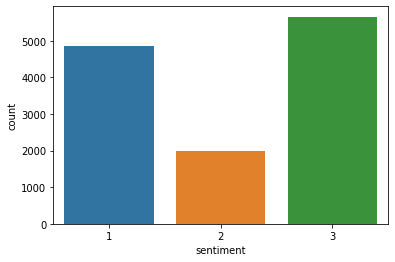

In [8]:
import seaborn as sns
sns.countplot(x='sentiment', data=df)

In [9]:
X = df.iloc[:, 0].values  
y = df.iloc[:, 2].values

In [10]:
X[12]

"Horrible app. It doesn't do as described. Absolutely no support!"

# Preprocessing Data

Stemming dan Lemmatization keduanya menghasilkan semacam kata dasar dari kata-kata infleksi dan oleh karena itu satu-satunya perbedaan adalah bahwa hasil stemming mungkin bukan kata yang sebenarnya sedangkan, lemma adalah kata bahasa yang sebenarnya. Stemmimng lebih cepat, tapi kami memutuskan memakai lemma agar makna kata tidak terganti. 

In [11]:
lemma = nltk.wordnet.WordNetLemmatizer()

def stopWordAndStem(inputStr):
    tokens = word_tokenize(inputStr)
    removed = []
    for i in tokens:
        removed.append(lemma.lemmatize(i))
    return " ".join(removed)

In [12]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
after_preprocessed = []

for sentence in X: 
    # Remove all link
    s = sentence.replace('\n','')

    s = re.sub(r"http\S+", "", s)

    result = s.replace("&amp;", "");
    
    # Remove all emoji
    result = emoji_pattern.sub(r'', result)
    
    # Remove all the special characters
    result = re.sub(r'\W', ' ', result)
 
    # remove all single characters
    result = re.sub(r'\s+[a-zA-Z]\s+', ' ', result)
 
    # Substituting multiple spaces with single space
    result= re.sub(r'\s+', ' ', result, flags=re.I)
    
    result = re.sub(r"\d+", "", result)
    
    result = result.strip()
    
    # Converting to Lowercase
    result = result.lower()
    
    result = stopWordAndStem(result)
    
    after_preprocessed.append(result)

### Result After Preprocessing

In [13]:
after_preprocessed

['i can not open the app anymore',
 'i have been begging for refund from this app for over month and nobody is replying me',
 'very costly for the premium version approx indian rupee per year better to download the premium version of this app from apkmos website and use it microsoft to do list app is far more better',
 'used to keep me organized but all the update have made mess of thing cudn u leave well enuf alone guess ur techie feel the need to keep making change to justify continuing to collect their salary',
 'dan birthday oct',
 'it ha changed how viewed my different list now they are all jumbled together and can find what need',
 'i only looking for grocery list app but every time tap away from the app have to tap again after opening it again to see the list can find way to keep certain list showing when open or reopen the app eta in response to the reply it doesn work like that on my phone even if the grocery list is showing when open another app and then go back to the any do

# Training 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(after_preprocessed, y, test_size=0.25, random_state=42, stratify=y)

## Feature Extraction using TF-IDF

In [15]:
tfidfconverter = TfidfVectorizer(min_df=1, max_df=0.75, ngram_range=(1,2), stop_words="english")  

tfidfVectorizer digunakan untuk menkonversi dokumen mentah menjadi matriks fitur TF-IDF, min_df digunakan untuk menghiraukan term yang jarang muncul disini kami menggunakan 1 yang berarti jarang muncul pada 1 dokumen, sedangkan max_df merupakan kebalikannya yaitu menghiraukan term yang sering muncul, kami menggunakan 0.75 yang berarti muncul lebih dari 75% pada dokumen. ngram_range(1,2) berarti unigram dan bigram.

In [16]:
X_train = tfidfconverter.fit_transform(X_train)
X_test = tfidfconverter.transform(X_test)

### Save TF-IDF transform result vectorizer

In [17]:
import joblib

joblib.dump(tfidfconverter, "./tfidf-train.joblib")

['./tfidf-train.joblib']

## Random Forest

Random Forest merupakan salah satu metode dalam Decision Tree. Random Forest merupakan kombinasi masing-masing tree yang kemudian dikombinasikan ke dalam satu model. Random Forest bergantung pada sebuah nilai vektor random dengan distribusi yang sama. Random Forest terdiri dari classifier yang berbentuk pohon {h(x, θ k ), k = 1, . . .} dimana θk adalah random vector yang diditribusikan secara independen dan masing masing tree pada sebuah unit kan memilih class yang paling popular pada input x.

Random Forest digunakan untuk pemilihan fitur secara random, masing-masing training set diambil dengan pengganti dari training set asli kemudian tree ditanam pada sebuah training set menggunakan seleksi fitur random. Random Forest merupakan fitur yang paling sederhana dengan membentuk fitur seleksi secara random.

Sumber : 
Ho, Tin Kam (1995). Random Decision Forests (PDF). Proceedings of the 3rd International Conference on Document Analysis and Recognition, Montreal, QC, 14–16 August 1995. pp. 278–282. Breiman L (2001). “Random Forests”. Machine Learning. 45 (1): 5–32. doi:1023/A:1010933404324.

In [18]:
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  
text_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

n_estimators - default = 100 number of trees

random_state - default = none disini menggunakan 42. Random state sendiri disediakan untuk mengontrol random number generator yang digunakan. Random_state tidak berarti bahwa randomization selalu digunakan, bergantung dengan parameter lainnya.

    none(default) - menggunakan keadaan random dari numpy.random. Memanggil fungsi beberapa kali dengan instance yg sama tetapi hasil yang berbeda.
    an integer - nilai yang paling populer adalah 0 dan 42. Dengan menggunakan int akan menghasilkan hasil yang sama di semua panggilan yg berbeda.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [19]:
print(classification_report(y_test, text_classifier.predict(X_test)))  
print("accuracy test = ", accuracy_score(y_test, text_classifier.predict(X_test)))
print("accuracy train = ", accuracy_score(y_train, text_classifier.predict(X_train)))

              precision    recall  f1-score   support

           1       0.68      0.81      0.74      1212
           2       0.50      0.02      0.03       498
           3       0.73      0.86      0.78      1414

    accuracy                           0.70      3124
   macro avg       0.63      0.56      0.52      3124
weighted avg       0.67      0.70      0.65      3124

accuracy test =  0.7023047375160051
accuracy train =  0.9822857752641126


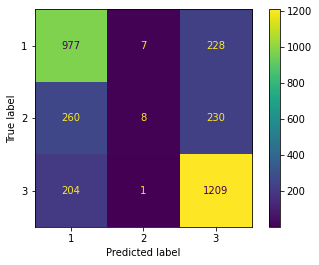

In [20]:
plot_confusion_matrix(text_classifier, X_test, y_test)  
plt.show()

- Secara diagonal dianggap mengembalikan prediksi yang benar
- Terdapat 976 yang benar diprediksi negatif tetapi ada 11 data negatif yang diprediksi netral dan 225 data negatif yang diprediksi positif dan juga terdapat 266 data netral yang diprediksi menjadi negatif dan 202 data positif yang diprediksi menjadi negatif

In [21]:
import joblib

joblib.dump(text_classifier, "./rf.joblib")

['./rf.joblib']

## Support Vector Machine (SVM)

Support Vector Machine (SVM) merupakan salah satu metode dalam supervised learning yang biasanya digunakan untuk klasifikasi (Support Vector Classification), regresi (Support Vector Regression), dan deteksi outliers. SVM merupakan model classifier yang mencari vektor yang diperbesar menjadi hyperplane terbaik yang memisahkan kelompok yang ada pada data latih. Dalam SVM objek data terluar yang paling dekat dengan hyperplane disebut support vector


### Kernel RBF

In [22]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', random_state=42, C=10)
svc.fit(X_train, y_train)

SVC(C=10, random_state=42)

SVC : mengimplementasikan pendekatan “one-versus-one” untuk klasifikasi multi-class.

kernel = 'rbf'
kernel 'rbf' atau <i>Radial Basis Function</i> adalah kernel default klasifikasi SVM sklearn. Fungsi kernel memungkinkan untuk mengimplementasikan suatu model pada ruang dimensi lebih tinggi (ruang fitur) tanpa harus mendefinisikan fungsi pemetaan.


random_state - default = none disini menggunakan 42. Random state sendiri disediakan untuk mengontrol random number generator yang digunakan. Random_state tidak berarti bahwa randomization selalu digunakan, bergantung dengan parameter lainnya.

In [23]:
print(classification_report(y_test, svc.predict(X_test)))  
print("accuracy test = ", accuracy_score(y_test, svc.predict(X_test)))
print("accuracy train = ", accuracy_score(y_train, svc.predict(X_train)))

              precision    recall  f1-score   support

           1       0.69      0.83      0.75      1212
           2       0.27      0.05      0.09       498
           3       0.77      0.85      0.80      1414

    accuracy                           0.71      3124
   macro avg       0.58      0.58      0.55      3124
weighted avg       0.66      0.71      0.67      3124

accuracy test =  0.7141485275288092
accuracy train =  0.9822857752641126


### Todo :  terdapat perbedaan accuracy dari percobaan sebelumnya dengan mengubah nilai C

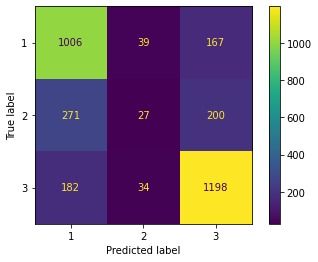

In [24]:
plot_confusion_matrix(svc, X_test, y_test)  
plt.show()

- Terdapat 1027 yang benar diprediksi negatif tetapi ada 7 data negatif yang diprediksi netral dan 178 data negatif yang diprediksi positif dan juga terdapat 282 data netral yang diprediksi menjadi negatif dan 199 data positif yang diprediksi menjadi negatif

In [25]:
import joblib

joblib.dump(svc, "./svm.joblib")

['./svm.joblib']

### Kernel Linear

In [26]:
svcLinear = SVC(kernel='linear', random_state=42, C=10)
svcLinear.fit(X_train, y_train)

SVC(C=10, kernel='linear', random_state=42)

#### TODO Linear kernel description

In [27]:
print(classification_report(y_test, svcLinear.predict(X_test)))  
print("accuracy test = ", accuracy_score(y_test, svcLinear.predict(X_test)))
print("accuracy train = ", accuracy_score(y_train, svcLinear.predict(X_train)))

              precision    recall  f1-score   support

           1       0.68      0.74      0.71      1212
           2       0.27      0.18      0.22       498
           3       0.76      0.79      0.78      1414

    accuracy                           0.67      3124
   macro avg       0.57      0.57      0.57      3124
weighted avg       0.65      0.67      0.66      3124

accuracy test =  0.674775928297055
accuracy train =  0.9816455020808879


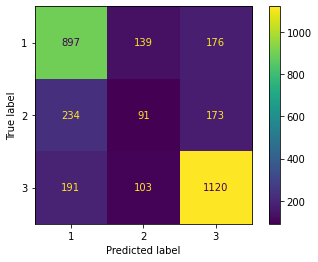

In [28]:
plot_confusion_matrix(svcLinear, X_test, y_test)  
plt.show()

In [29]:
import joblib

joblib.dump(svcLinear, "./svmLinear.joblib")

['./svmLinear.joblib']

## Perbandingan Kernel RBF dan Linear

## Kesimpulan

Akurasi data test cukup tinggi yaitu 70% saat menggunakan Random Forest dan juga 72% saat menggunakan Support Vector Machine. Saat pengetesan prediksi Sentiment Analysis ada beberapa kata yang masih belum tepat dipresiksi seperti kata "okay" yang dinilai negatif dan juga kalimat yang diawali dengan "not" seperti "not good" akan dianggap positif yang mungkin dikarenakan stopword removal untuk bahasa inggris.

### TODO change this sentences : tapi kalo diliat dari confusion matrix svm lebih baik karena lebih banyak neutral yang terprediksi dengan benar dibanding random forest